In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from envs import Maze
from utils import plot_policy,plot_action_values,test_agent

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

In [ ]:
env=Maze()

In [ ]:
action_values=np.zeros(shape=(5,5,4))

In [ ]:
def policy(state,epsilon=0.):
  if np.random.random()<epsilon:
    return np.random.randint(4)
  else:
    av=action_values[state]
    return np.random.choice(np.flatnonzero(av==av.max()))

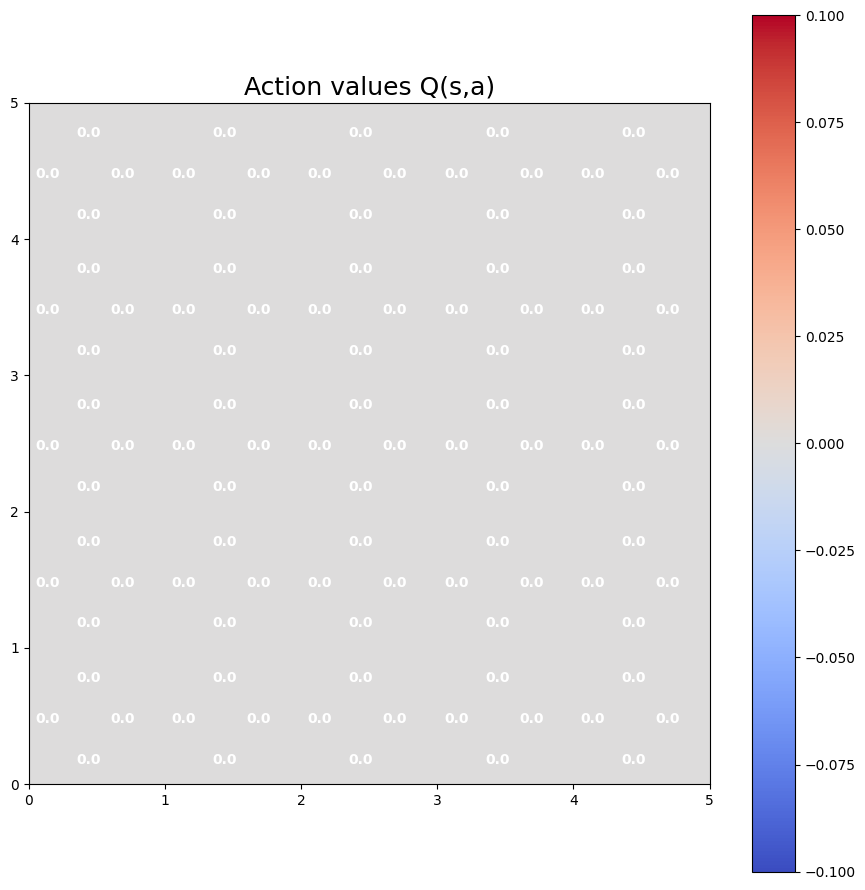

In [ ]:
plot_action_values(action_values)

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


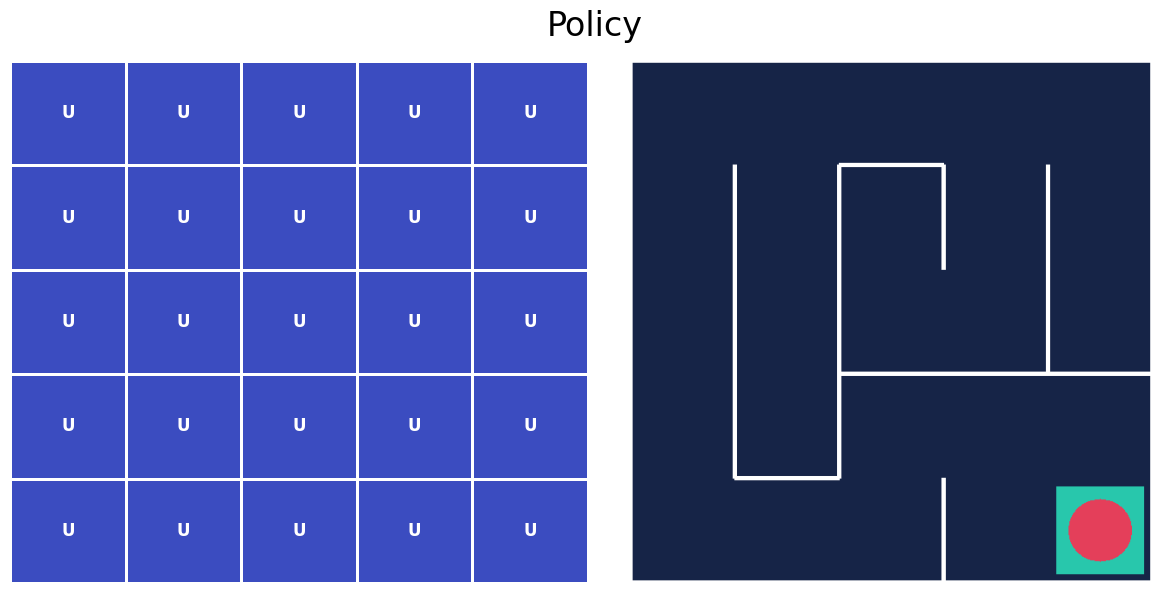

In [ ]:
plot_policy(action_values,env.render(mode='rgb_array'))

In [ ]:
def sarsa(action_values,policy,episodes,alpha=0.1,gamma=0.99,epsilon=0.2):
  for episode in range(1, episodes+1):
    state=env.reset()
    action=policy(state,epsilon)
    done=False
    while not done:
      next_state,reward,done,_=env.step(action)
      next_action=policy(next_state,epsilon)

      qsa=action_values[state][action]
      next_qsa=action_values[next_state][next_action]

      action_values[state][action]=qsa+alpha*(reward+gamma*next_qsa-qsa)
      state=next_state
      action=next_action

In [ ]:
sarsa(action_values,policy,1000)

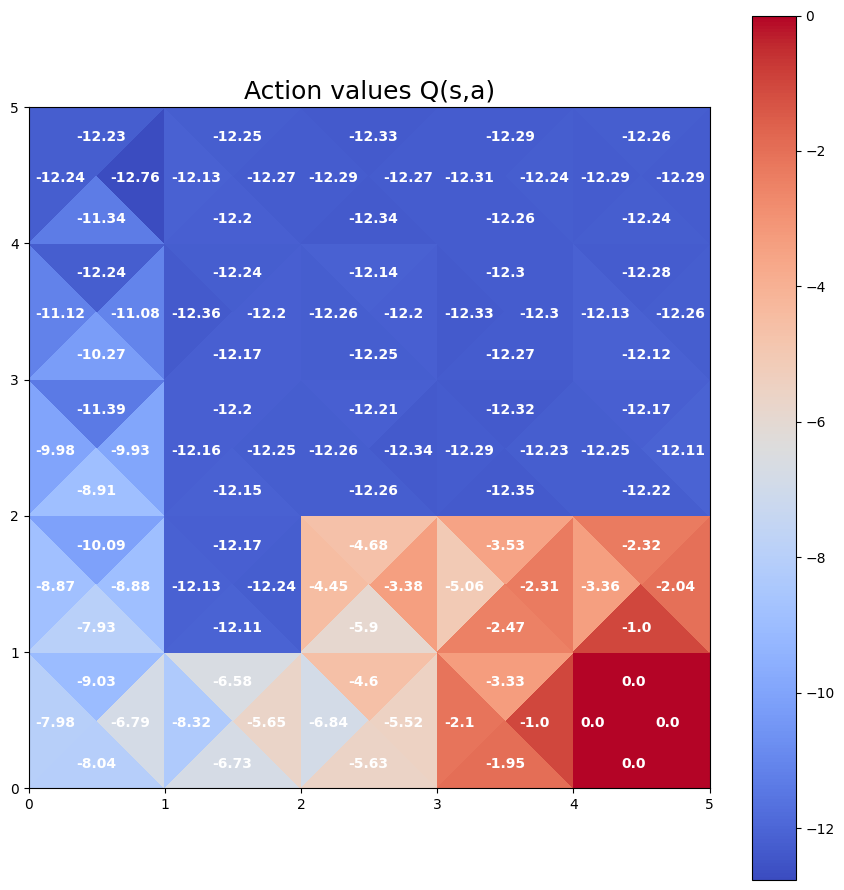

In [ ]:
plot_action_values(action_values)

/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


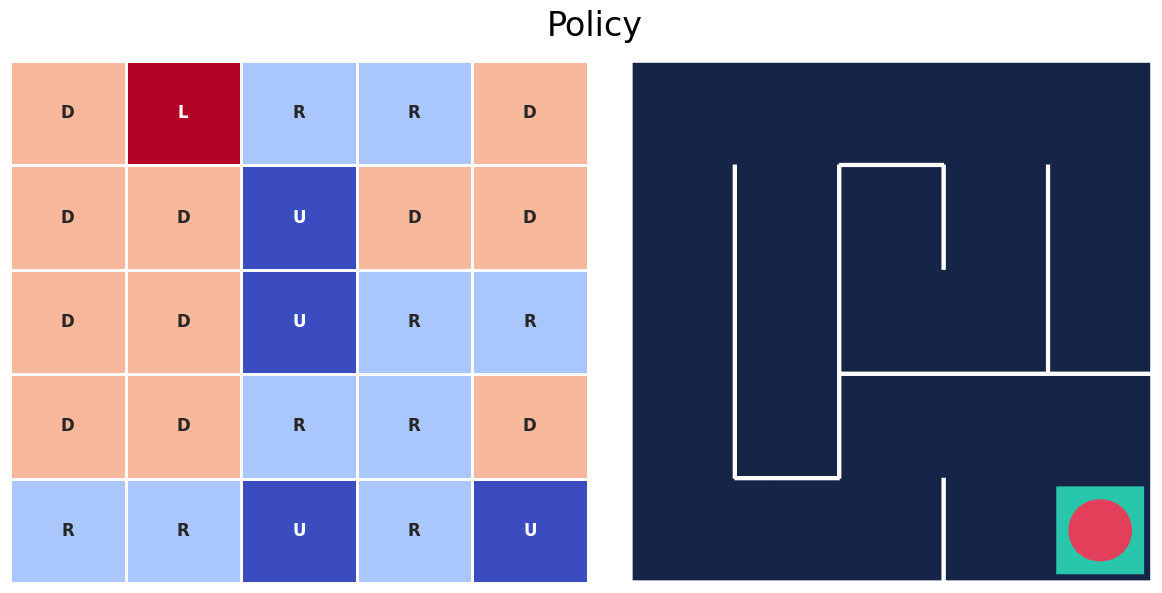

In [ ]:
plot_policy(action_values,env.render(mode='rgb_array'))

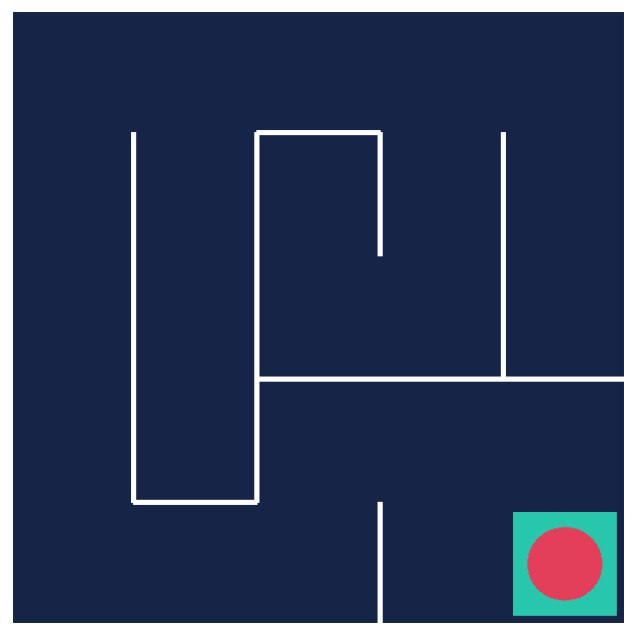

In [ ]:
test_agent(env,policy,episodes=5)